# Analisi su rischio infarto

descrizione del dataset:  
    - Gender  
    - Age: Normalized age  
    - Cholesterol: Normalized cholesterol level  
    - Heart rate: Normalized resting heart rate  
    - Diabetes: Whether the patient has diabetes (0 = No, 1 = Yes)  
    - Smoking: Whether the patient smokes (0 = No, 1 = Yes)  
    - Obesity: Whether the patient is obese (0 = No, 1 = Yes)  
    - Alcohol Consumption: Frequency of alcohol intake  
    - Exercise Hours Per Week: Number of hours spent exercising per week  
    - Diet: Categorized diet habits  
    - Previous Heart Problems: Whether the patient had prior heart issues  
    - Medication Use: Whether the patient is on medication  
    - Stress Level: Normalized stress level  
    - Sedentary Hours Per Day: Daily sedentary time in hours  
    - BMI: Body Mass Index (Normalized)  
    - Triglycerides: Normalized triglyceride level  
    - Sleep Hours Per Day: Daily sleep duration  
    - Systolic blood pressure: Normalized systolic BP  
    - Diastolic blood pressure: Normalized diastolic BP  
    - Blood sugar: Normalized blood sugar level  
    - CK-MB: Creatine Kinase-MB enzyme level  
    - Troponin: Troponin enzyme level  
    - Heart Attack Risk: (Target Variable) Binary value (0 = Low Risk, 1 = High Risk)


In [8]:
import pandas as pd
df = pd.read_csv('dataset/mainDataset.csv')
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
print(df.head())

        Age  Cholesterol  ...  Systolic blood pressure  Diastolic blood pressure
0  0.595506     0.314286  ...                 0.600000                  0.534884
1  0.595506     0.096429  ...                 0.574194                  0.569767
2  0.595506     0.189286  ...                 0.187097                  0.674419
3  0.078652     0.960714  ...                 0.645161                  0.593023
4  0.078652     0.792857  ...                 0.251613                  0.383721

[5 rows x 26 columns]


prima di procedere all'addestramento dei modelli, si evidenzia la sovrabbondanza di entry che hanno il campo Heart Attack Risk (Binary) a 0.

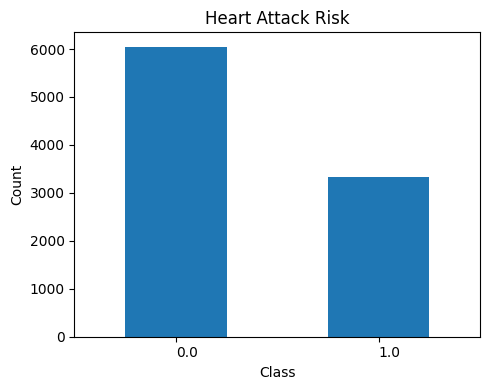

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
diet_counts = df['Heart Attack Risk'].value_counts().sort_index()
diet_counts.plot(kind='bar')
plt.title('Heart Attack Risk')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0, ha='left')
plt.tight_layout()
plt.show()

Ciò comporterà un addestramento erroneo in seguito.  
(il fatto che devi under/oversample la classe 0/1)

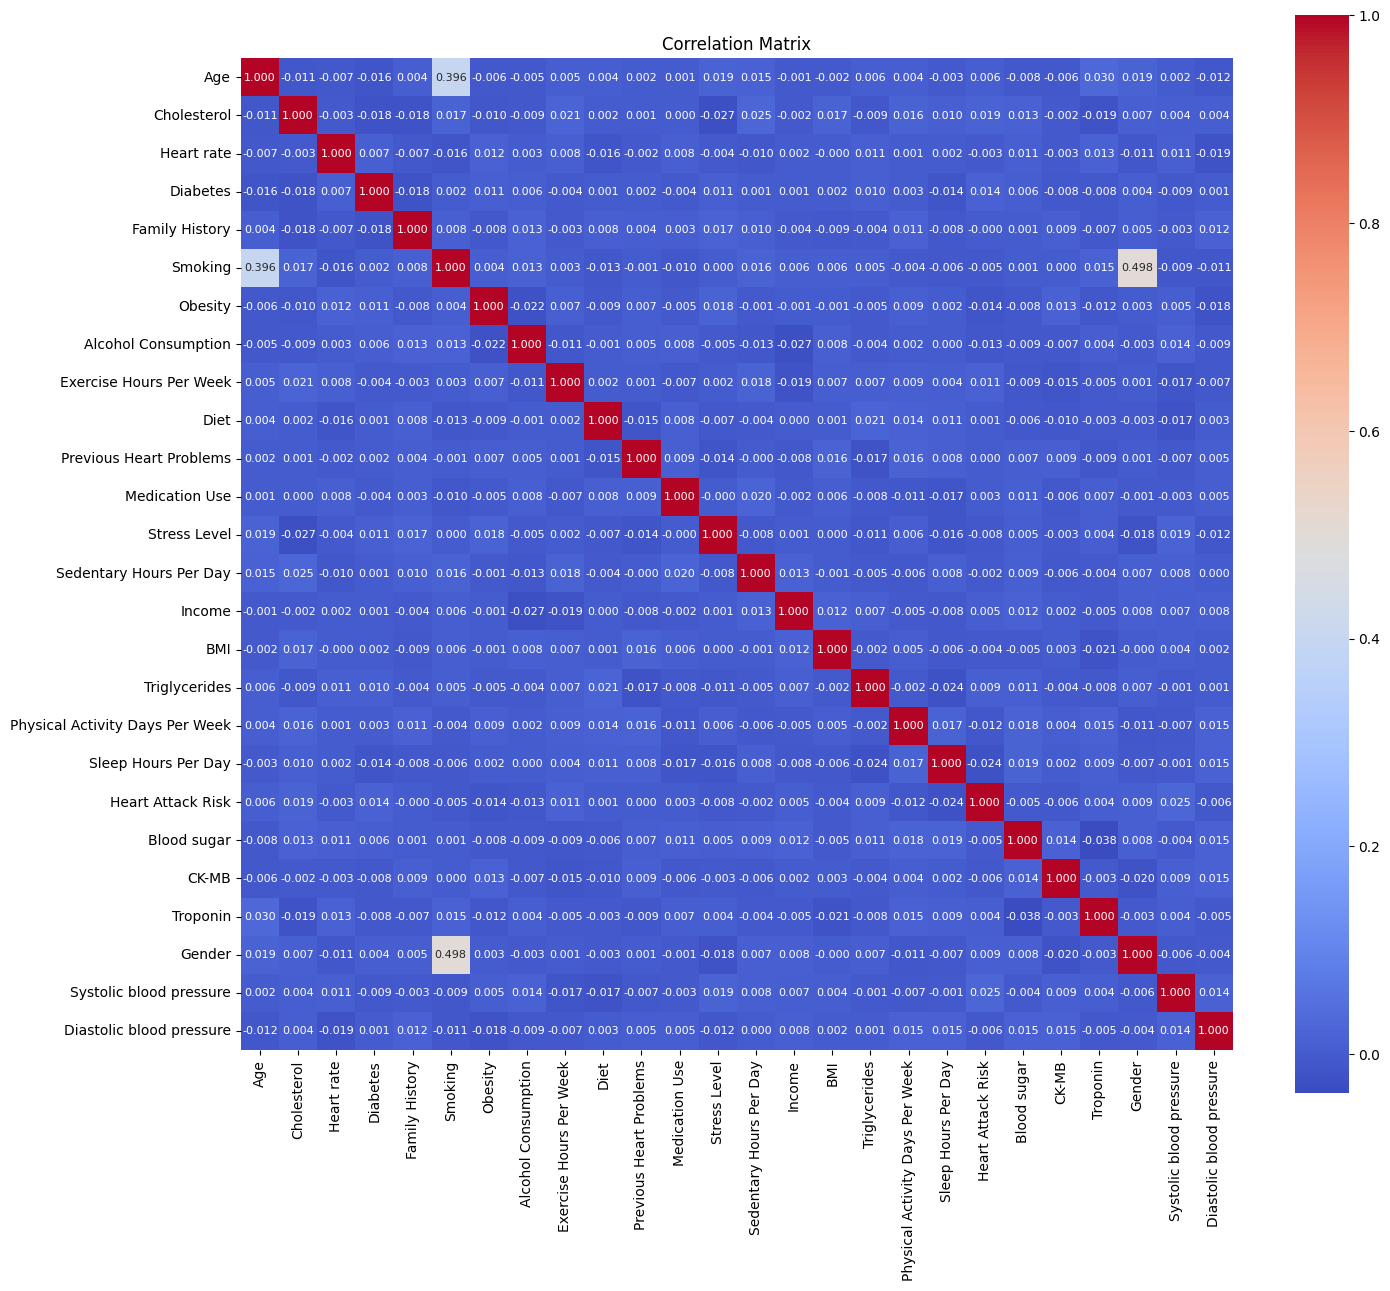

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 14))  # Increase the figure size
import seaborn as sns
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".3f",            # Show only 2 decimal places
    cmap='coolwarm',
    square=True,
    annot_kws={'size': 8} # Smaller font for annotations
)
plt.title('Correlation Matrix')
plt.show()

yapping yapping addestriamo un modello di classificazione e vediamo che succede

In [12]:
from sklearn.model_selection import train_test_split
Y = df['Heart Attack Risk']
X = df.drop(columns=['Heart Attack Risk'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# we'll try several classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix

# random forest
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

Y_rf_train_pred = rf.predict(X_train)
Y_rf_test_pred = rf.predict(X_test)
print("Random Forest Classifier\n")
print("predicted on train set:")
print(confusion_matrix(Y_train, Y_rf_train_pred))
print(classification_report(Y_train, Y_rf_train_pred))
print("\npredicted on test set:")
print(confusion_matrix(Y_test, Y_rf_test_pred))
print(classification_report(Y_test, Y_rf_test_pred))


Random Forest Classifier

predicted on train set:
[[4818    0]
 [   0 2683]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4818
         1.0       1.00      1.00      1.00      2683

    accuracy                           1.00      7501
   macro avg       1.00      1.00      1.00      7501
weighted avg       1.00      1.00      1.00      7501


predicted on test set:
[[1208   20]
 [ 595   53]]
              precision    recall  f1-score   support

         0.0       0.67      0.98      0.80      1228
         1.0       0.73      0.08      0.15       648

    accuracy                           0.67      1876
   macro avg       0.70      0.53      0.47      1876
weighted avg       0.69      0.67      0.57      1876



yapping yapping esce brutto perchè il modello si impara a supporre sia classe 0 vista la sovrabbondanza nel dataset